[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


In [66]:
!git clone https://github.com/brandontan99/Self_Love_App.git
%cd Self_Love_App

Cloning into 'Self_Love_App'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 61 (delta 31), reused 9 (delta 4), pack-reused 0
Unpacking objects: 100% (61/61), done.
/content/Self_Love_App/Self_Love_App


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from data_cleaning import data_cleaning
from Data_Normalization import data_encoding, data_normalization
import time

In [68]:
df = pd.read_csv("WID3006 ML Questionnaire.csv")
df = data_cleaning(df)
df = data_encoding(df)
df_norm = data_normalization(df)
df_norm

,Gender:,What is your current occupation?,What boosts your confidence ?,I prefer to spend my money on....,How do you organize your thoughts? Please pick whichever is closest.,Choose a pet which you prefer to keep.,What is your favorite time of the day?,Would you rather visit the future or the past?,What do you worry more about the most?,"When you retire, you'd like to live...",What is your favorite color?,What is your learning style? (Pick one that benefit you the most),Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?,Team sports,Badminton,Dancing,Fishing,Playing computer games,Playing board games,Reading,Exercising,Writing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
0,0.0,0.0,0.6,1.00,0.75,0.777778,0.333333,0.5,0.00,0.2,0.500000,1.0,0.50,0.50,0.50,0.50,0.50,0.666667,1.00,0.75,0.75,0.75,0.75,0.75,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.00,0.50,0.222222,0.666667,0.5,1.00,0.4,1.000000,1.0,0.75,0.00,0.25,0.50,0.25,0.333333,0.50,0.25,0.50,0.75,0.25,0.50,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.8,1.00,1.00,0.333333,1.000000,0.0,1.00,0.6,0.333333,0.2,0.25,0.50,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.75,1.00,0.75,0.50,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.8,0.25,0.00,0.222222,0.666667,0.0,0.75,0.8,0.333333,0.6,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.50,0.75,0.75,0.75,1.00,0.75,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.8,0.50,0.50,0.222222,1.000000,0.5,1.00,1.0,0.166667,1.0,0.25,0.75,0.75,1.00,1.00,1.000000,1.00,1.00,0.50,1.00,1.00,1.00,1.00,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.0,1.0,0.8,0.50,1.00,0.222222,1.000000,0.5,0.50,0.6,0.833333,0.4,0.00,1.00,0.50,0.75,0.75,1.000000,0.25,0.75,0.75,0.50,0.25,0.00,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,1.0,1.0,0.2,0.00,0.75,0.222222,0.666667,1.0,1.00,1.0,0.000000,0.0,0.50,0.25,0.50,0.75,0.50,0.666667,0.25,0.50,0.75,0.75,1.00,0.75,0.75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,1.0,1.0,0.8,0.25,0.75,0.777778,0.333333,0.0,0.00,1.0,0.000000,0.4,0.50,0.50,0.50,1.00,0.75,0.666667,0.75,0.75,0.25,0.75,0.25,1.00,0.50,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,1.0,1.0,1.0,0.00,0.75,0.777778,1.000000,1.0,1.00,0.8,0.166667,0.6,1.00,1.00,0.25,1.00,0.25,0.666667,1.00,0.50,0.00,0.50,0.75,1.00,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Personality Traits
traits = df_norm.iloc[:, 0:25]
# Hobbies
hobbies = df_norm.iloc[:, 25:]

In [70]:
traits

,Gender:,What is your current occupation?,What boosts your confidence ?,I prefer to spend my money on....,How do you organize your thoughts? Please pick whichever is closest.,Choose a pet which you prefer to keep.,What is your favorite time of the day?,Would you rather visit the future or the past?,What do you worry more about the most?,"When you retire, you'd like to live...",What is your favorite color?,What is your learning style? (Pick one that benefit you the most),Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?
0,0.0,0.0,0.6,1.00,0.75,0.777778,0.333333,0.5,0.00,0.2,0.500000,1.0,0.50,0.50,0.50,0.50,0.50,0.666667,1.00,0.75,0.75,0.75,0.75,0.75,0.75
1,1.0,1.0,0.0,1.00,0.50,0.222222,0.666667,0.5,1.00,0.4,1.000000,1.0,0.75,0.00,0.25,0.50,0.25,0.333333,0.50,0.25,0.50,0.75,0.25,0.50,0.25
2,1.0,1.0,0.8,1.00,1.00,0.333333,1.000000,0.0,1.00,0.6,0.333333,0.2,0.25,0.50,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.75,1.00,0.75,0.50
3,1.0,1.0,0.8,0.25,0.00,0.222222,0.666667,0.0,0.75,0.8,0.333333,0.6,0.75,0.75,0.75,0.75,0.50,1.000000,1.00,0.50,0.75,0.75,0.75,1.00,0.75
4,1.0,1.0,0.8,0.50,0.50,0.222222,1.000000,0.5,1.00,1.0,0.166667,1.0,0.25,0.75,0.75,1.00,1.00,1.000000,1.00,1.00,0.50,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.0,1.0,0.8,0.50,1.00,0.222222,1.000000,0.5,0.50,0.6,0.833333,0.4,0.00,1.00,0.50,0.75,0.75,1.000000,0.25,0.75,0.75,0.50,0.25,0.00,0.75
190,1.0,1.0,0.2,0.00,0.75,0.222222,0.666667,1.0,1.00,1.0,0.000000,0.0,0.50,0.25,0.50,0.75,0.50,0.666667,0.25,0.50,0.75,0.75,1.00,0.75,0.75
191,1.0,1.0,0.8,0.25,0.75,0.777778,0.333333,0.0,0.00,1.0,0.000000,0.4,0.50,0.50,0.50,1.00,0.75,0.666667,0.75,0.75,0.25,0.75,0.25,1.00,0.50
192,1.0,1.0,1.0,0.00,0.75,0.777778,1.000000,1.0,1.00,0.8,0.166667,0.6,1.00,1.00,0.25,1.00,0.25,0.666667,1.00,0.50,0.00,0.50,0.75,1.00,0.50


In [71]:
hobbies

,Team sports,Badminton,Dancing,Fishing,Playing computer games,Playing board games,Reading,Exercising,Writing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
y=hobbies.sum().values
print(y)
print(list(hobbies.columns.values))

[ 25.  48.  36.   5.  81.  36. 108.  71.  36.  12.  37.  53.  56.  32.
  21.   6.   9.   8.   3.   4.   1.   3.]
['Team sports', 'Badminton', 'Dancing', 'Fishing', 'Playing computer games', 'Playing board games', 'Reading', 'Exercising', 'Writing', 'Gardening', 'Painting', 'Cooking', 'Singing', 'Puzzles', 'Collecting', 'Watching movies', 'Watching TV series', 'Sleeping', 'Photography and Videography', 'Listening to music', 'Crocheting', 'Playing a musical instrument']


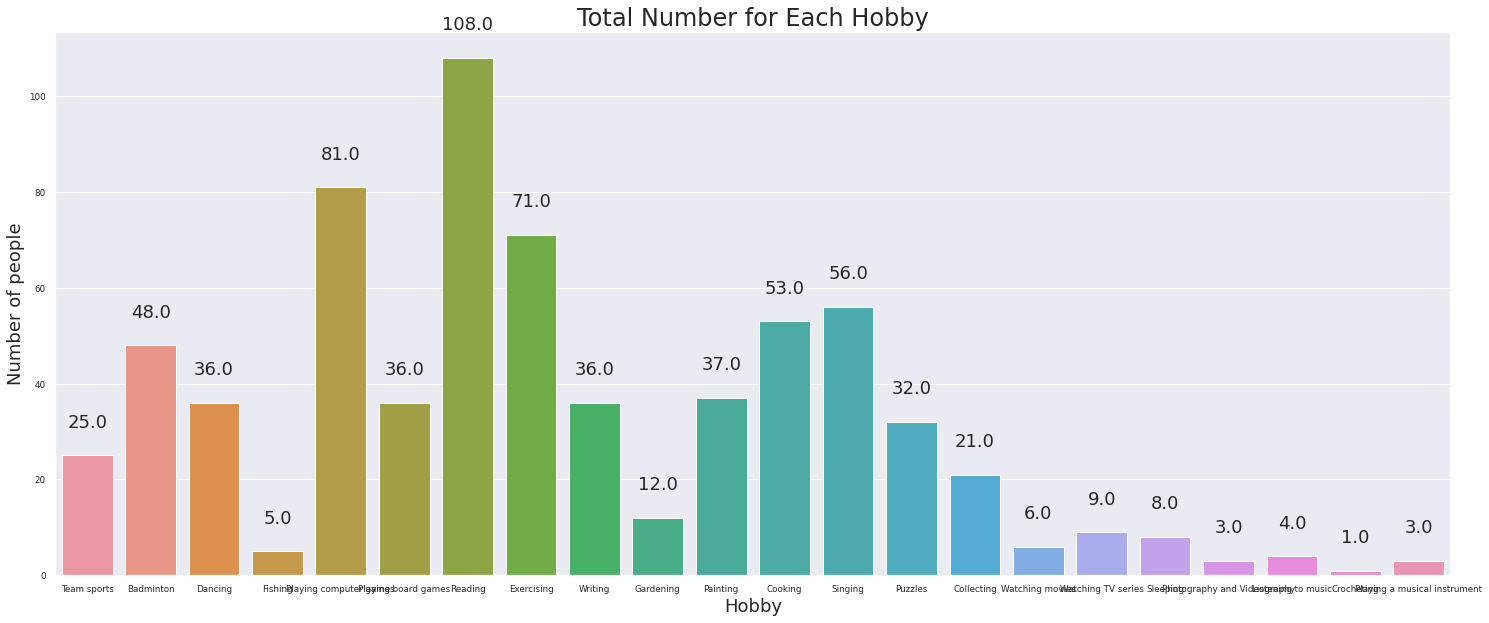

In [73]:
#Overview of data
categories = list(hobbies.columns.values)
sns.set(font_scale = 0.8)
plt.figure(figsize=(25,10))
ax= sns.barplot(x=categories, y=hobbies.sum().values)
plt.title("Total Number for Each Hobby", fontsize=24)
plt.ylabel('Number of people', fontsize=18)
plt.xlabel('Hobby', fontsize=18)
#adding the text labels
rects = ax.patches
labels = df_norm.iloc[:,25:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_norm, random_state=1, test_size=0.25, shuffle=True)

x_train = train.iloc[:, :25]
y_train = train.iloc[:, 25:]

x_test = test.iloc[:, :25]
y_test = test.iloc[:, 25:]

In [75]:
x_train

,Gender:,What is your current occupation?,What boosts your confidence ?,I prefer to spend my money on....,How do you organize your thoughts? Please pick whichever is closest.,Choose a pet which you prefer to keep.,What is your favorite time of the day?,Would you rather visit the future or the past?,What do you worry more about the most?,"When you retire, you'd like to live...",What is your favorite color?,What is your learning style? (Pick one that benefit you the most),Do you enjoy socializing with large groups of people?,Do you enjoy challenges?,How creative of a person do you think you are?,How logical of a person do you think you are?,Would you prefer to engage your brain more than your body?,Are you a curious person?,Are you a perfectionist?,Are you a trusting person?,Do you have lot of patience?,Do you organize your schedule well?,Do you like to sit in front of a computer for long hours?,Do you enjoy making others happy?,Can you understand others' perspectives and feelings?
107,1.0,1.000000,0.8,0.25,1.00,0.666667,1.000000,0.0,1.00,0.2,0.500000,0.4,0.75,0.75,0.75,0.75,0.75,0.666667,0.75,0.75,0.75,0.25,0.75,0.75,0.75
42,1.0,1.000000,0.8,1.00,1.00,0.111111,0.666667,0.5,0.75,0.6,0.000000,0.2,1.00,1.00,0.75,0.50,0.75,0.333333,0.25,1.00,1.00,0.75,0.50,0.75,0.75
17,1.0,1.000000,0.8,0.25,0.25,0.222222,1.000000,0.0,0.75,0.6,0.000000,0.2,0.50,0.50,0.50,0.50,0.75,0.333333,0.50,0.75,0.50,0.50,0.75,0.50,0.75
5,1.0,1.000000,1.0,0.00,1.00,0.222222,1.000000,0.0,0.75,1.0,0.166667,0.2,0.75,0.75,0.50,0.75,0.50,0.666667,0.75,0.75,0.75,0.75,0.75,0.75,0.75
117,0.0,1.000000,0.2,0.00,1.00,0.666667,0.666667,0.0,1.00,1.0,0.500000,0.0,0.75,0.75,0.75,0.75,0.50,0.333333,0.50,0.75,0.75,0.50,0.50,1.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1.0,0.333333,0.4,0.00,0.00,0.555556,1.000000,1.0,0.50,0.0,0.000000,0.0,1.00,1.00,0.50,0.75,0.00,0.333333,0.75,0.50,0.25,0.75,0.50,0.25,0.50
137,0.0,1.000000,0.8,0.00,1.00,0.111111,0.333333,1.0,1.00,0.0,0.000000,0.2,0.25,0.25,0.75,0.50,0.75,0.666667,0.75,0.75,0.75,0.50,0.25,0.75,0.75
72,0.0,1.000000,0.8,0.00,0.75,0.111111,1.000000,0.5,1.00,1.0,0.833333,0.6,1.00,0.75,0.50,0.25,0.50,1.000000,0.00,0.00,0.75,0.50,0.00,1.00,1.00
140,0.0,1.000000,1.0,0.25,0.00,0.222222,1.000000,0.0,0.25,0.6,0.500000,0.4,0.00,1.00,0.75,0.75,1.00,1.000000,0.75,0.25,0.50,0.00,1.00,0.25,1.00


In [76]:
y_train

,Team sports,Badminton,Dancing,Fishing,Playing computer games,Playing board games,Reading,Exercising,Writing,Gardening,Painting,Cooking,Singing,Puzzles,Collecting,Watching movies,Watching TV series,Sleeping,Photography and Videography,Listening to music,Crocheting,Playing a musical instrument
107,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Defining the Model



In [77]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Model taken from: https://machinelearningmastery.com/multi-label-classification-with-deep-learning/
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

#Training the Model
Absolutely shit accuracy btw

In [79]:
# Evaluation procedure taken from: https://machinelearningmastery.com/multi-label-classification-with-deep-learning/
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=300)
        # make a prediction on the test set
        yhat = model(X_test)
        # round probabilities to class labels
        yhat = tf.round(yhat)
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        # store result
        print('>%.3f' % acc)
        results.append(acc)
    return results

X = traits.to_numpy()
y = hobbies.to_numpy()

results = evaluate_model(X,y)

print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

>0.000
>0.000
>0.000
>0.050
>0.053
>0.000
>0.053
>0.000
>0.000
>0.053
>0.050
>0.000
>0.000
>0.000
>0.053
>0.053
>0.053
>0.000
>0.105
>0.000
>0.000
>0.100
>0.100
>0.000
>0.053
>0.000
>0.000
>0.053
>0.053
>0.000
Accuracy: 0.029 (0.034)
